Dataset : https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import PIL
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# import tensorflow as tf
# from tensorflow import keras
warnings.filterwarnings('ignore')

In [51]:
# from keras.preprocessing.image import Image

In [52]:
"D:\PetImages"

'D:\\PetImages'

In [53]:
dataset_path = "D:\\PetImages\\"

In [54]:
input_path = []
label = []

for class_name in os.listdir(dataset_path):
    for path in os.listdir(dataset_path+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(dataset_path, class_name, path))
print(input_path[0], label[0])

D:\PetImages\Cat\0.jpg 0


In [55]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
# command shuffles the rows of df and resets the index without keeping the old index
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  D:\PetImages\Dog\11838.jpg      1
1  D:\PetImages\Dog\12232.jpg      1
2   D:\PetImages\Dog\4893.jpg      1
3  D:\PetImages\Dog\10629.jpg      1
4   D:\PetImages\Cat\6449.jpg      0

In [56]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

In [57]:
import PIL
l = []
for image in df['images']:
    print(i)
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages\Dog\4852.jpg
D:\PetImages

['D:\\PetImages\\Dog\\11702.jpg', 'D:\\PetImages\\Cat\\666.jpg']

In [58]:
df = df[df["images"]!="D:\\PetImages\\Cat\\Thumbs.db"]
df = df[df["images"]!="D:\\PetImages\\Dog\\Thumbs.db"]
df = df[df["images"]!="D:\\PetImages\\Dog\\11702.jpg"]
df = df[df["images"]!="D:\\PetImages\\Cat\\666.jpg"]

In [59]:
len(df)

24998

# Exploratory Data Analysis

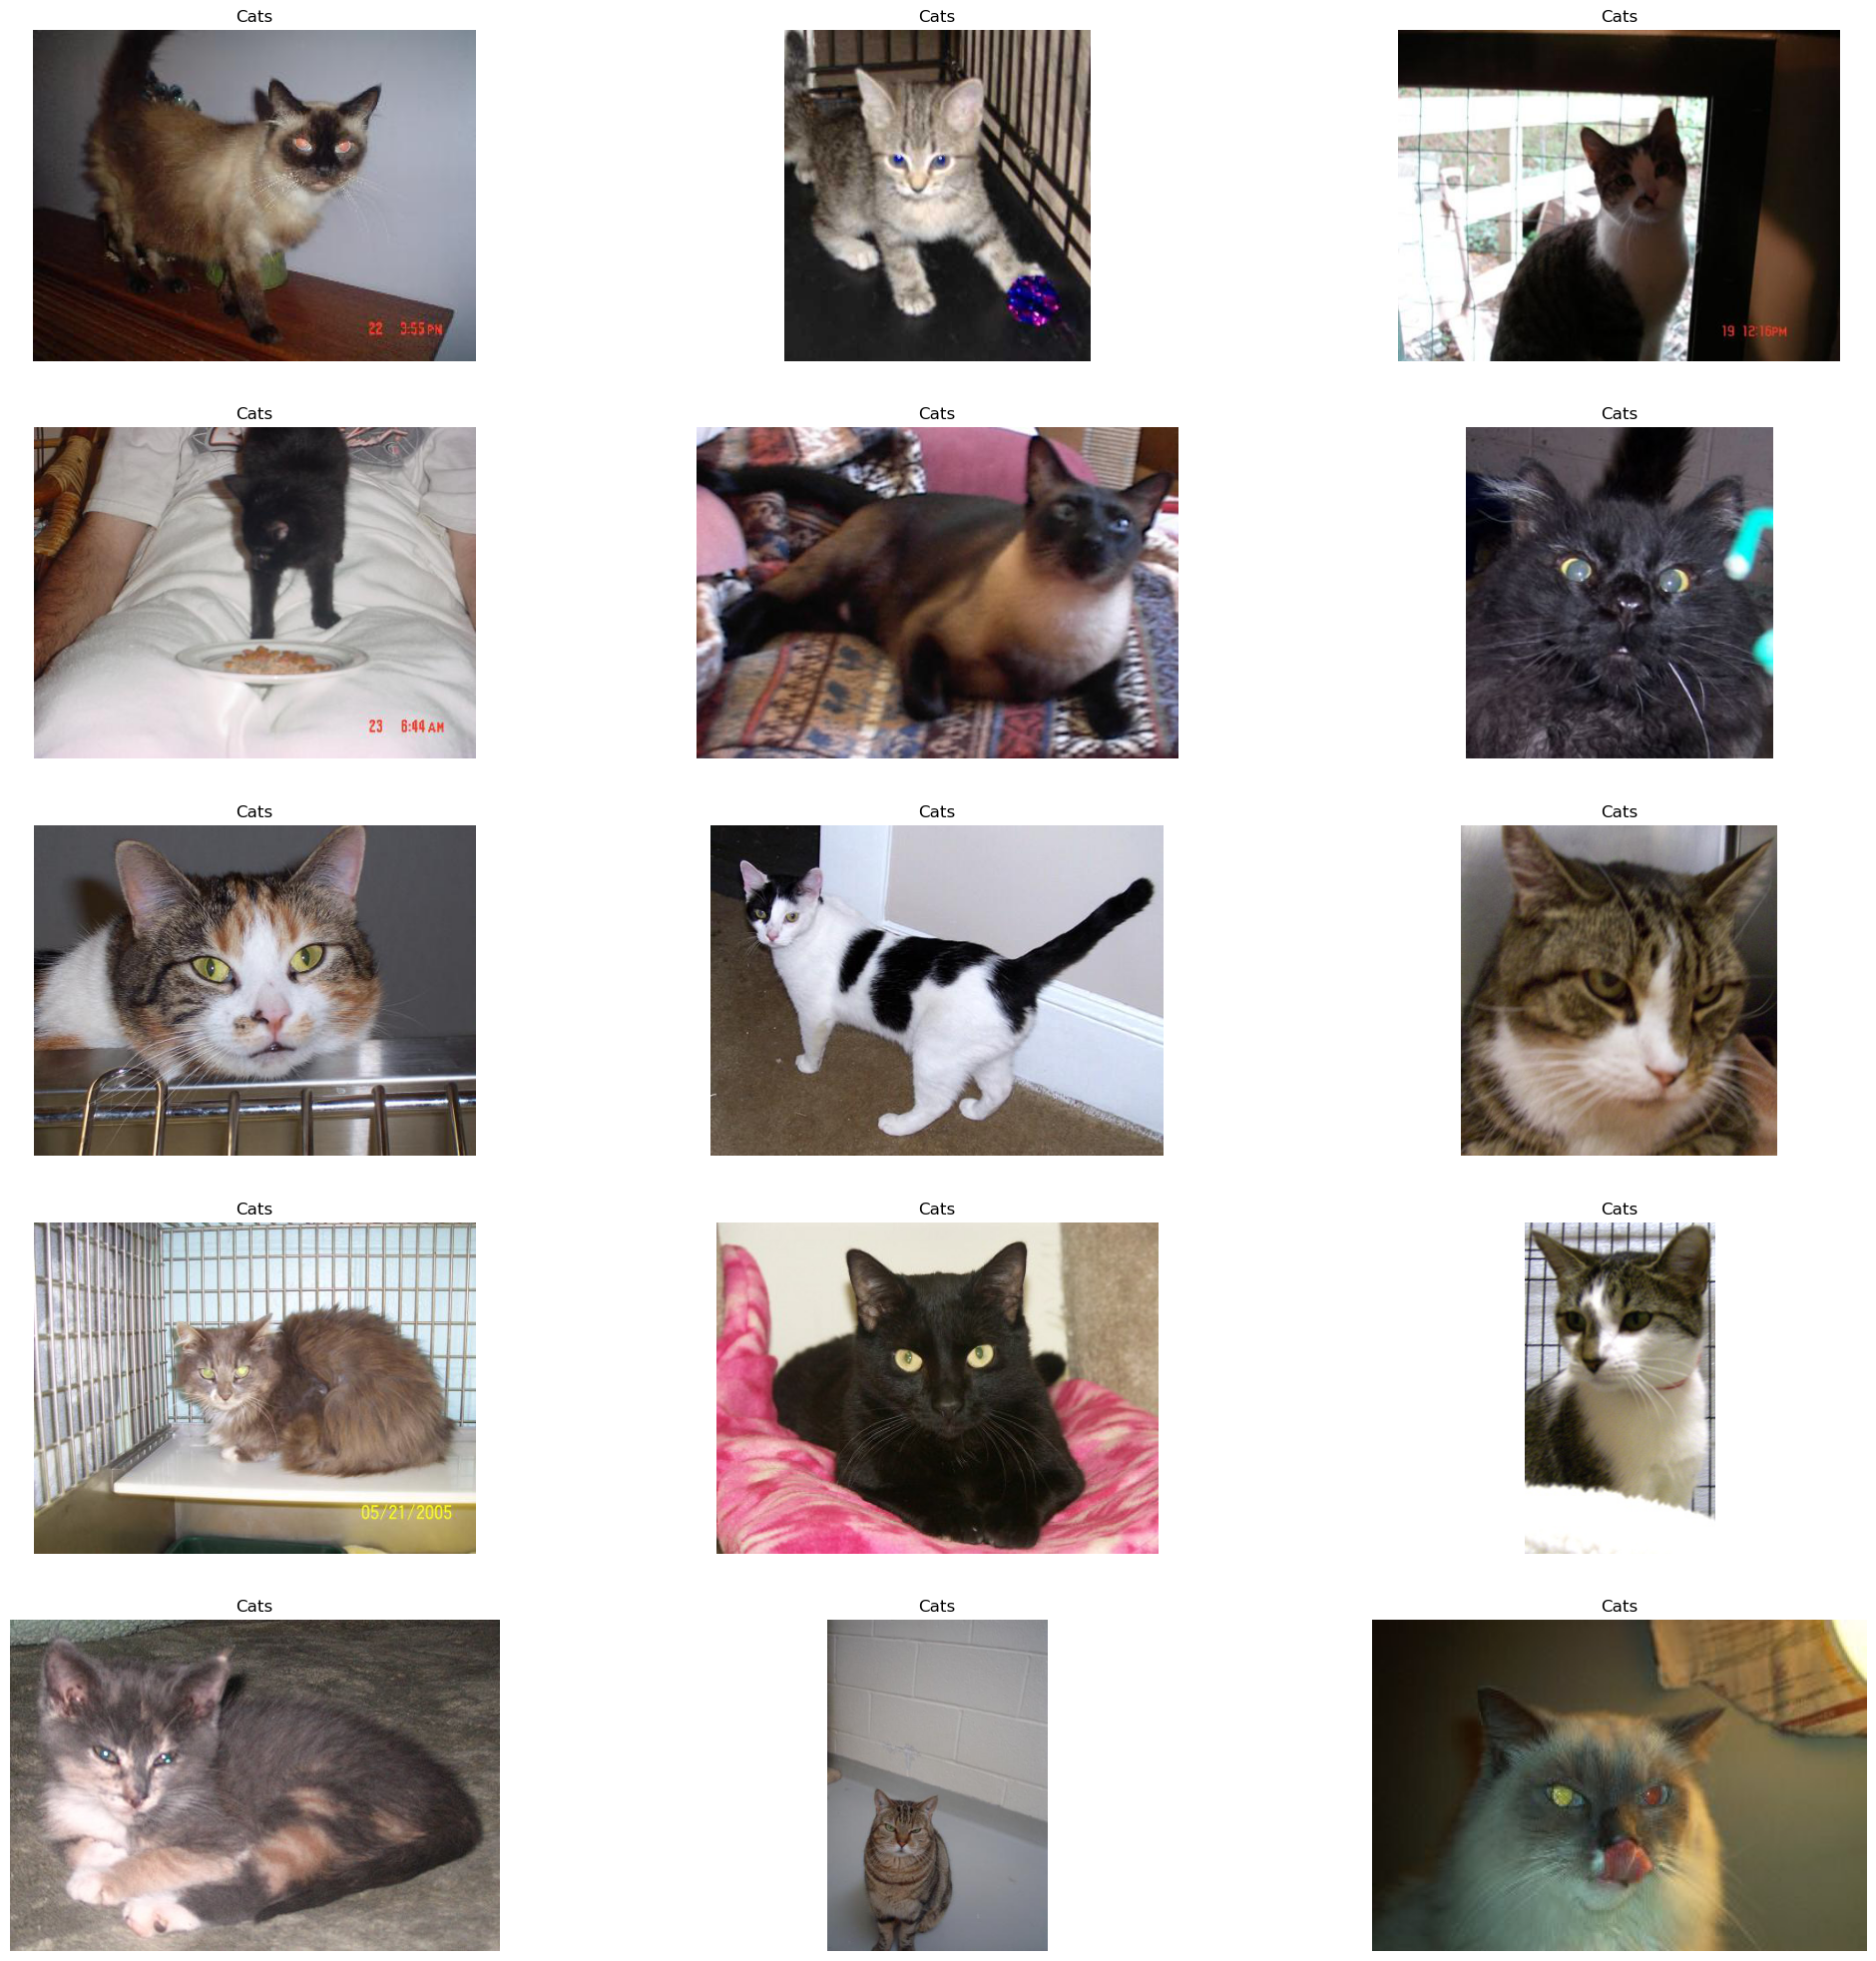

In [61]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]
temp_cat = temp['images']
temp_cat = list(temp_cat)
for i in range(0,15):
        plt.subplot(5,3,i+1)
        img = PIL.Image.open(temp_cat[i])
        plt.imshow(img)
        plt.title('Cats')
        plt.axis("off")



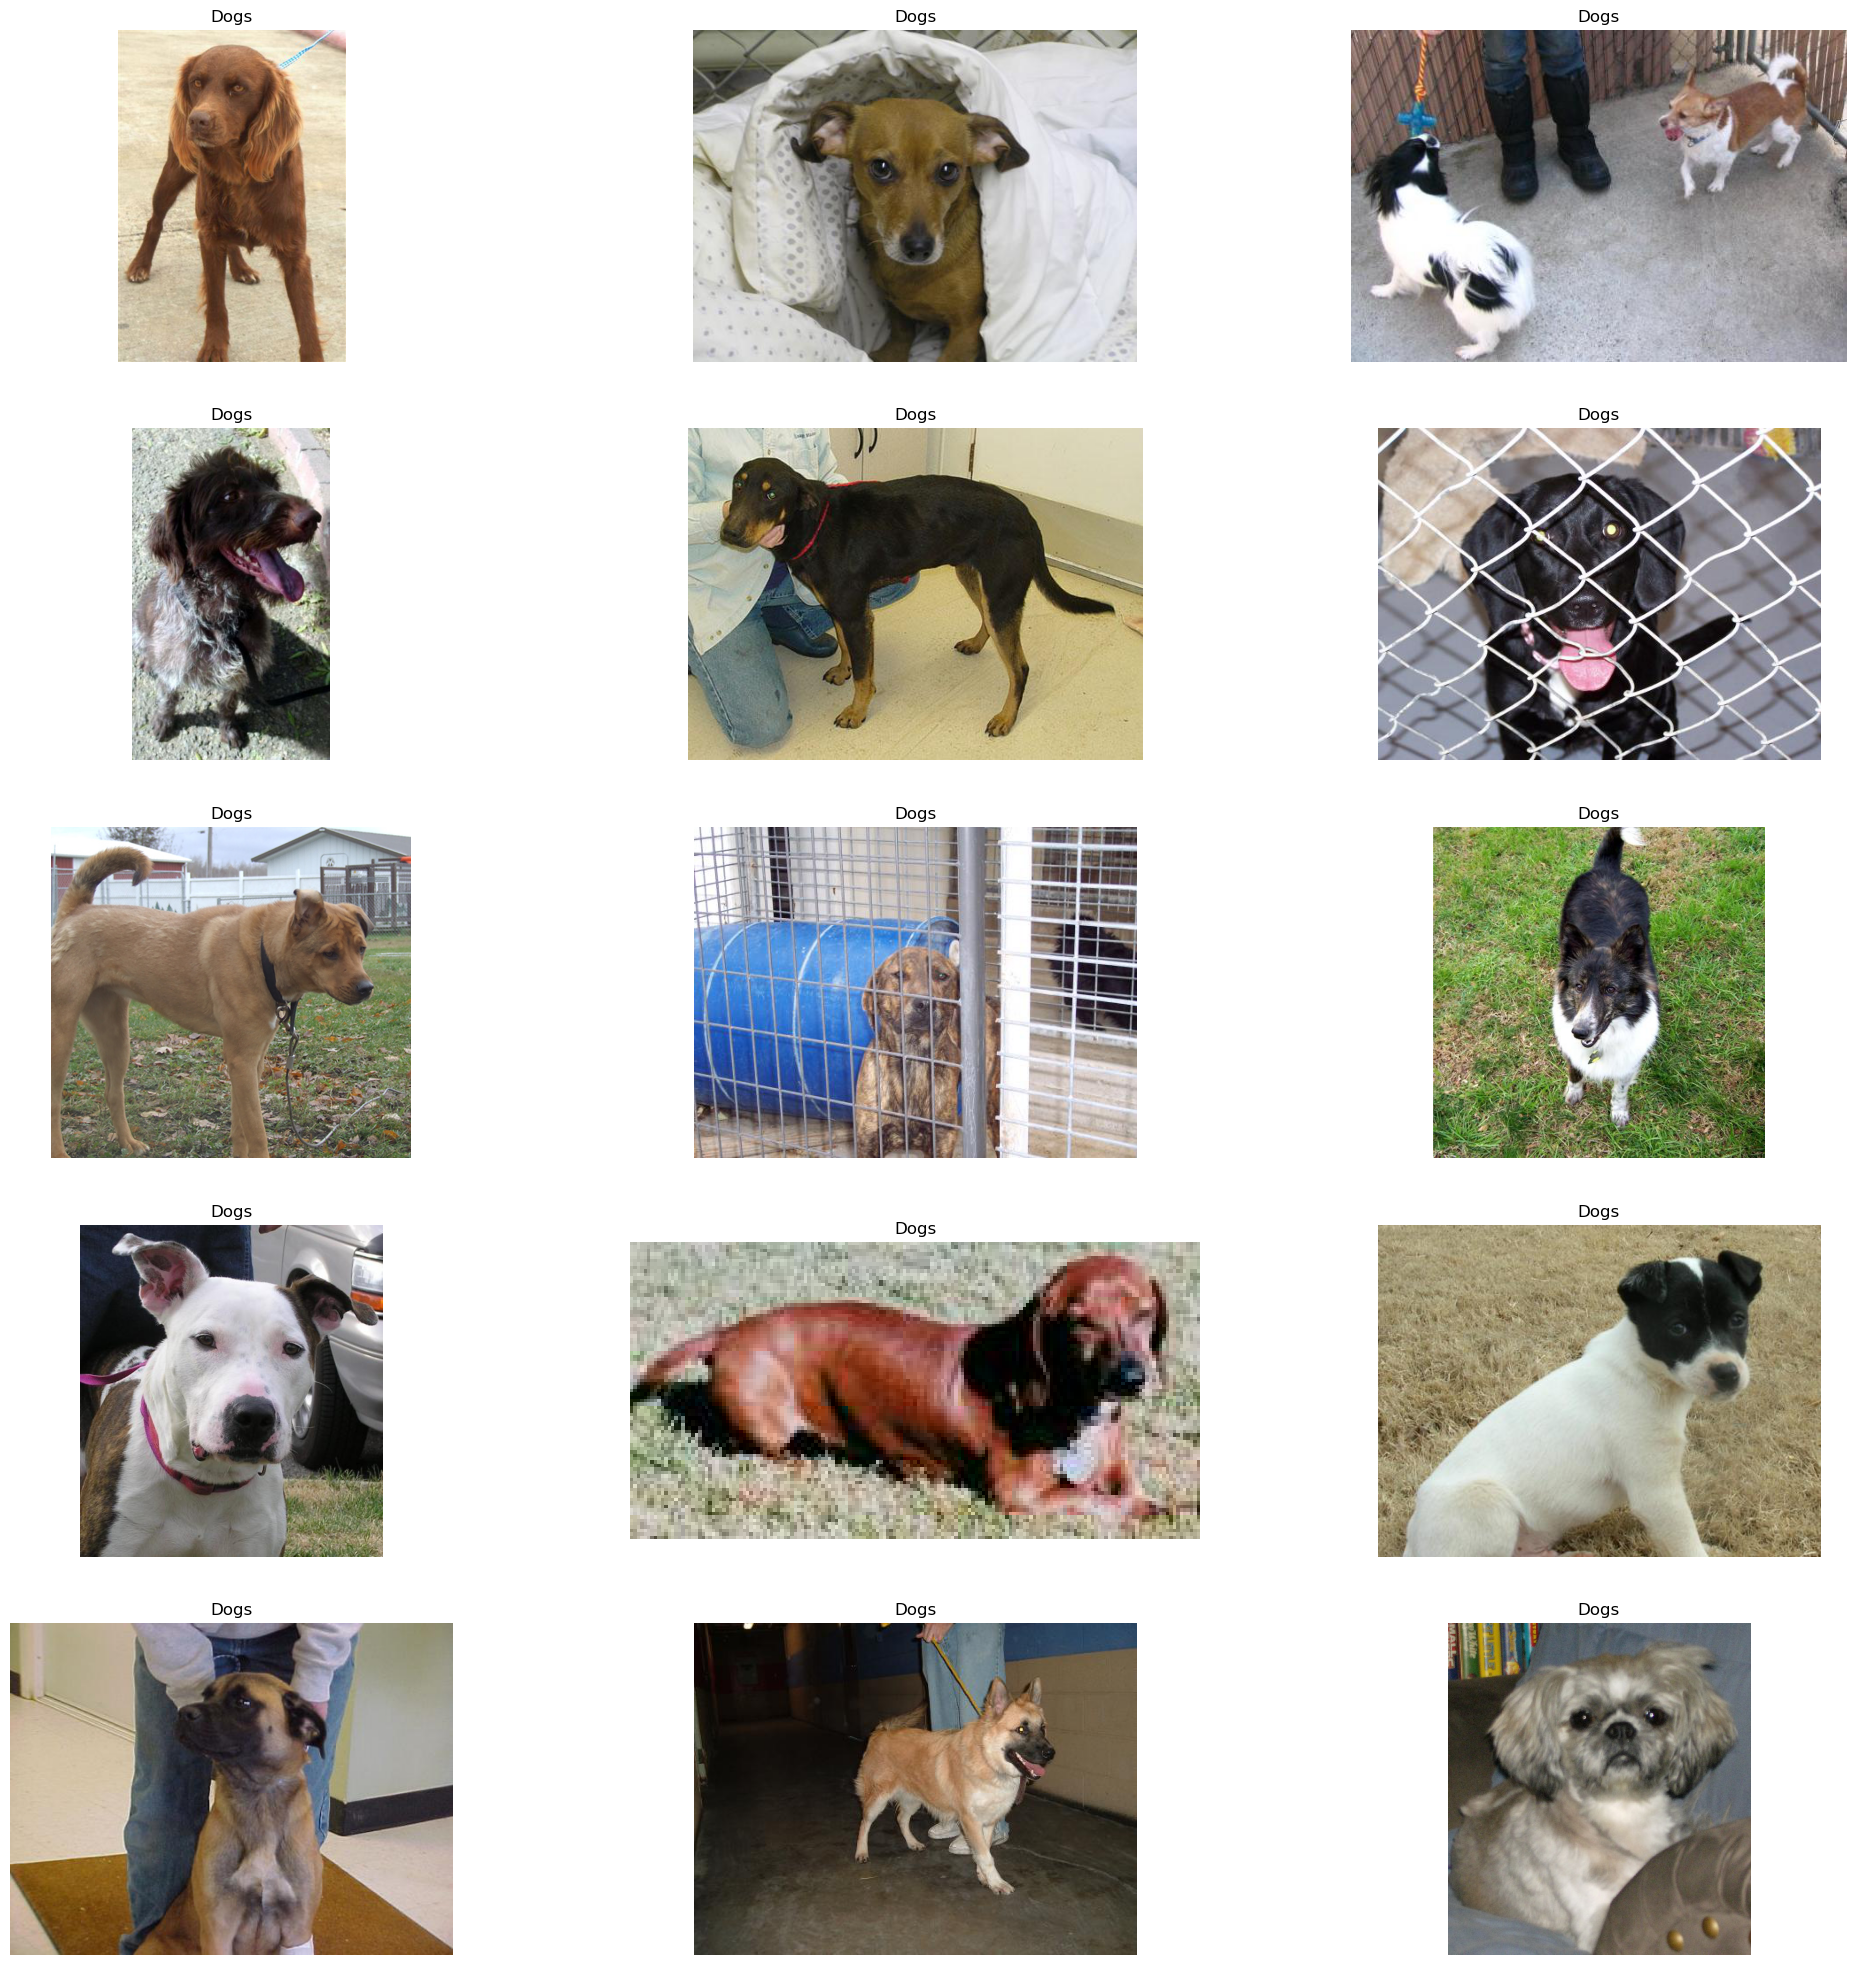

In [62]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]
temp_dog = temp['images']
temp_dog = list(temp_dog)
for i in range(0,15):
        plt.subplot(5,3,i+1)
        img = PIL.Image.open(temp_dog[i])
        plt.imshow(img)
        plt.title('Dogs')
        plt.axis("off")



In [13]:
# sns.countplot(df['label'])

# Create DataGenerator for the Images

In [17]:
df['label'] = df['label'].astype('str')

In [18]:
df.head()

images label
0  D:\PetImages\Dog\7521.jpg     1
1  D:\PetImages\Cat\1868.jpg     0
2  D:\PetImages\Cat\8400.jpg     0
3  D:\PetImages\Dog\8228.jpg     1
4  D:\PetImages\Dog\3608.jpg     1

In [19]:
#input split
train,test = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
train.shape

(19998, 2)

In [21]:
test.shape

(5000, 2)

In [22]:
train.head()

images label
23288  D:\PetImages\Cat\5125.jpg     0
17782  D:\PetImages\Dog\9954.jpg     1
1020   D:\PetImages\Cat\4971.jpg     0
12645  D:\PetImages\Cat\7183.jpg     0
1533   D:\PetImages\Cat\5077.jpg     0

In [23]:
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

#Here no augmentation because the data should not be altered
val_generator = ImageDataGenerator(rescale = 1./255) 

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)
val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# Model Creation 

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [25]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape = (128,128,3)),
    MaxPool2D((2,2)),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')   
])

In [26]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 242s 6s/step - accuracy: 0.6769 - loss: 0.5975 - val_accuracy: 0.7184 - val_loss: 0.5604
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 190s 5s/step - accuracy: 0.7107 - loss: 0.5550 - val_accuracy: 0.7184 - val_loss: 0.5604
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 186s 5s/step - accuracy: 0.7391 - loss: 0.5316 - val_accuracy: 0.7448 - val_loss: 0.5268
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 402s 10s/step - accuracy: 0.7342 - loss: 0.5256 - val_accuracy: 0.7606 - val_loss: 0.5035
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 528s 13s/step - accuracy: 0.7539 - loss: 0.4973 - val_accuracy: 0.7604 - val_loss: 0.5039
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.7738 - loss: 0.4714 - val_accuracy: 0.7682 - val_loss: 0.4847
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 378s 9s/step - accuracy: 0.7729 - loss: 0.4759 - val_accuracy: 0.7856 - val_loss: 0.4681
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 356s 9s/step - accuracy: 0.7768 - loss: 0.4571 - val_accuracy: 0.7862 -

# Visualization of result


<Figure size 640x480 with 0 Axes>

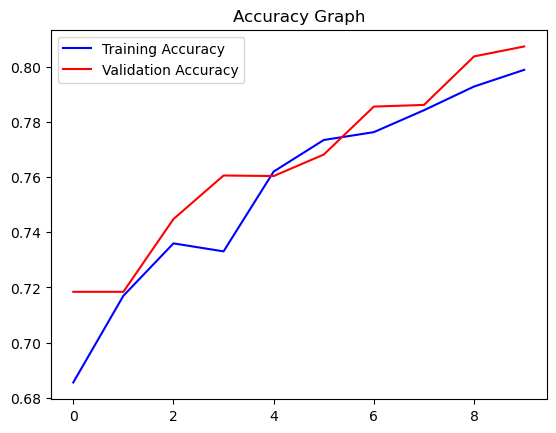

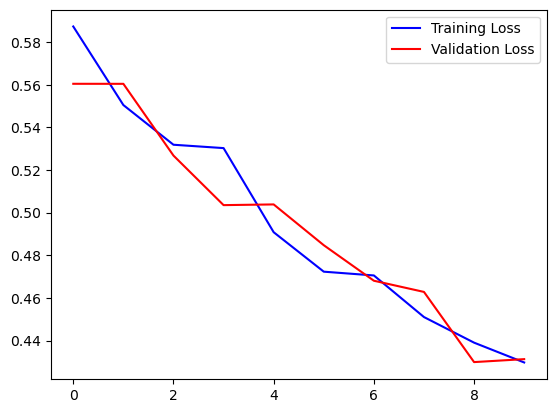

<Figure size 640x480 with 0 Axes>

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend()
plt.figure()

In [39]:
# Test with real image
image_path = "D:\\jenny.jpg"
img = load_img(image_path, target_size=(128,128))
img = np.array(img)
img = img/255.0
img = img.reshape(1,128,128,3)
pred = model.predict(img)
output = pred[0][0]
if output>0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Dog


In [41]:
# Test with real image
image_path = "G:\\cat.jpg"
img = load_img(image_path, target_size=(128,128))
img = np.array(img)
img = img/255.0
img = img.reshape(1,128,128,3)
pred = model.predict(img)
output = pred[0][0]
if output>0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Cat


In [64]:
import pickle

with open("Dog_VS_Cat_classigication.pickle", "wb") as f:
    pickle.dump(model, f)